# Rasterio
- [公式ドキュメント](https://rasterio.readthedocs.io/en/latest/)
- [リポジトリ](https://github.com/mapbox/rasterio/)

In [76]:
import rasterio
import numpy as np
import rasterio.windows
import rasterio.plot
import rasterio.features
import geopandas as gpd
import random

## 作成

In [21]:
array0 = (np.random.randint(0, 225, 2000).reshape((40, 50))).astype('uint8').T
array1 = (np.array(range(2000)).reshape((50, 40)) % 256).astype('uint8')
array2 = (np.array(range(2000)).reshape((40, 50)) % 256).astype('uint8').T
array = np.array((array0, array1, array2))
array

array([[[184, 202, 180, ...,  44, 174, 171],
        [ 12, 191,  12, ...,   7,  54, 153],
        [193,  42,  62, ...,  29, 211, 116],
        ...,
        [ 84,  48,  42, ..., 215, 147, 210],
        [ 53,  63, 183, ..., 219, 168, 165],
        [169,  30, 100, ..., 223, 218, 223]],

       [[  0,   1,   2, ...,  37,  38,  39],
        [ 40,  41,  42, ...,  77,  78,  79],
        [ 80,  81,  82, ..., 117, 118, 119],
        ...,
        [ 88,  89,  90, ..., 125, 126, 127],
        [128, 129, 130, ..., 165, 166, 167],
        [168, 169, 170, ..., 205, 206, 207]],

       [[  0,  50, 100, ...,  58, 108, 158],
        [  1,  51, 101, ...,  59, 109, 159],
        [  2,  52, 102, ...,  60, 110, 160],
        ...,
        [ 47,  97, 147, ..., 105, 155, 205],
        [ 48,  98, 148, ..., 106, 156, 206],
        [ 49,  99, 149, ..., 107, 157, 207]]], dtype=uint8)

In [3]:
profile = rasterio.profiles.DefaultGTiffProfile()

In [24]:
profile['count'], profile['height'], profile['width'] = array.shape

In [23]:
profile['transform'] =  rasterio.transform.from_bounds(west=139,
                                                       south=35,
                                                       east=140,
                                                       north=36,
                                                       width=array.shape[2],
                                                       height=array.shape[1])
profile['crs'] = rasterio.crs.CRS.from_epsg(4326)
profile

{'driver': 'GTiff', 'interleave': 'band', 'tiled': True, 'blockxsize': 256, 'blockysize': 256, 'compress': 'lzw', 'nodata': 0, 'dtype': 'uint8', 'transform': Affine(0.025, 0.0, 139.0,
       0.0, -0.02, 36.0), 'crs': CRS.from_epsg(4326), 'count': 2, 'height': 30, 'width': 40}

## read/write

In [25]:
with rasterio.open('data/raster_4326.tif','w', **profile) as dst:
    dst.write(array)

In [30]:
array

array([[[184, 202, 180, ...,  44, 174, 171],
        [ 12, 191,  12, ...,   7,  54, 153],
        [193,  42,  62, ...,  29, 211, 116],
        ...,
        [ 84,  48,  42, ..., 215, 147, 210],
        [ 53,  63, 183, ..., 219, 168, 165],
        [169,  30, 100, ..., 223, 218, 223]],

       [[  0,   1,   2, ...,  37,  38,  39],
        [ 40,  41,  42, ...,  77,  78,  79],
        [ 80,  81,  82, ..., 117, 118, 119],
        ...,
        [ 88,  89,  90, ..., 125, 126, 127],
        [128, 129, 130, ..., 165, 166, 167],
        [168, 169, 170, ..., 205, 206, 207]],

       [[  0,  50, 100, ...,  58, 108, 158],
        [  1,  51, 101, ...,  59, 109, 159],
        [  2,  52, 102, ...,  60, 110, 160],
        ...,
        [ 47,  97, 147, ..., 105, 155, 205],
        [ 48,  98, 148, ..., 106, 156, 206],
        [ 49,  99, 149, ..., 107, 157, 207]]], dtype=uint8)

## plot

In [40]:
(array/255).min()

0.0

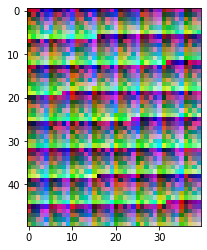

In [46]:
import rasterio.plot
rasterio.plot.show((array/255).astype('float32'))


## Get coordinates

In [26]:
rasterio.transform.xy(transform =profile["transform"],
                      rows=1, cols=1, offset='center')

(139.0375, 35.97)

In [27]:

profile["transform"]

Affine(0.025, 0.0, 139.0,
       0.0, -0.02, 36.0)

## profile

In [60]:
with rasterio.open('data/raster_4326.tif') as src:
    profile = src.profile
dir(profile)

['_MutableMapping__marker',
 '__abstractmethods__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 'clear',
 'copy',
 'data',
 'defaults',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

## Windows

In [66]:
# change tile size 
with rasterio.open('data/raster_4326.tif') as src:
    array = src.read()
    profile = src.profile
    profile.update({'blockxsize':16,
                    'blockysize':16})
    with rasterio.open('data/raster_4326_blk-10.tif', 'w', **profile) as dst:
        dst.write(array)

In [67]:
profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 40, 'height': 50, 'count': 3, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.025, 0.0, 139.0,
       0.0, -0.02, 36.0), 'blockxsize': 16, 'blockysize': 16, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

In [68]:
with rasterio.MemoryFile() as memfile:
    with memfile.open(**profile) as src:
        windows = list(src.block_windows())
print(windows)

[((0, 0), Window(col_off=0, row_off=0, width=16, height=16)), ((0, 1), Window(col_off=16, row_off=0, width=16, height=16)), ((0, 2), Window(col_off=32, row_off=0, width=8, height=16)), ((1, 0), Window(col_off=0, row_off=16, width=16, height=16)), ((1, 1), Window(col_off=16, row_off=16, width=16, height=16)), ((1, 2), Window(col_off=32, row_off=16, width=8, height=16)), ((2, 0), Window(col_off=0, row_off=32, width=16, height=16)), ((2, 1), Window(col_off=16, row_off=32, width=16, height=16)), ((2, 2), Window(col_off=32, row_off=32, width=8, height=16)), ((3, 0), Window(col_off=0, row_off=48, width=16, height=2)), ((3, 1), Window(col_off=16, row_off=48, width=16, height=2)), ((3, 2), Window(col_off=32, row_off=48, width=8, height=2))]


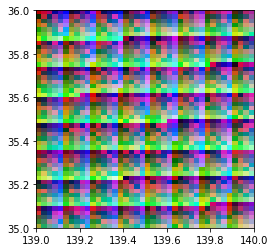

In [104]:
def as_rasterio_datareader(array, profile):
    def wrapper(func):
        def _wrapper(*args, **kwargs):
            with rasterio.MemoryFile() as memfile:
                with memfile.open(**profile) as src:
                    src.write(array)
                with rasterio.open(memfile) as src:
                    return func(src)
        return _wrapper
    return wrapper
@as_rasterio_datareader(array = array, profile = profile)
def myplot(src):
    rasterio.plot.show(src)

myplot(array=array, profile=profile)

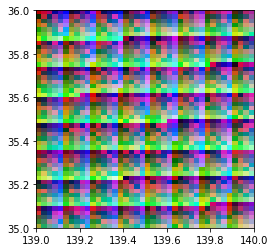

In [98]:
with rasterio.MemoryFile() as memfile:
    with memfile.open(**profile) as src:
        src.write(array)
    with rasterio.open(memfile) as src:
        rasterio.plot.show(src)

## Rasterize

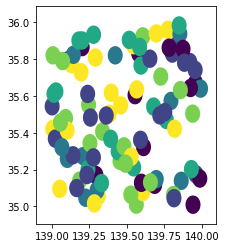

In [60]:
vector_gdf = gpd.read_file('data/r_points_buff.shp')
vector_gdf['cat'] = [random.randint(0, 5) for i in range(len(vector_gdf))]
vector_gdf.plot(column='cat')

In [63]:
vector_gdf

,class,geometry,cat
0,a,"POLYGON ((139.85215 35.83012, 139.85191 35.825...",1
1,c,"POLYGON ((139.61260 35.00986, 139.61236 35.004...",4
2,a,"POLYGON ((139.50344 35.24756, 139.50320 35.242...",4
3,b,"POLYGON ((140.00679 35.66969, 140.00655 35.664...",0
4,a,"POLYGON ((139.62810 35.83197, 139.62786 35.827...",0
...,...,...,...
95,e,"POLYGON ((139.90639 35.63182, 139.90615 35.626...",4
96,e,"POLYGON ((139.33897 35.80853, 139.33873 35.803...",5
97,b,"POLYGON ((139.70650 35.13089, 139.70626 35.125...",4
98,a,"POLYGON ((139.10659 35.45623, 139.10635 35.451...",4


## Reference

In [126]:
array = np.array(range(24), dtype='uint8').reshape((2,3,4))
profile = rasterio.profiles.DefaultGTiffProfile()
profile['count'], profile['height'], profile['width'] = array.shape
profile['transform'] = rasterio.transform.from_bounds(
    west=139, south=35, east=140, north=36,
    width=array.shape[2], height=array.shape[1])
profile['crs'] = rasterio.crs.CRS.from_epsg(4326)
with rasterio.MemoryFile() as memfile:
    with memfile.open(**profile) as src:
        _memfile = src
print(_memfile.bounds)
print(list(_memfile.block_windows()))

BoundingBox(left=139.0, bottom=35.0, right=140.0, top=36.0)


RasterioIOError: Dataset is closed: /vsimem/145109e4-5676-4563-ad46-5f96cc38ea69/145109e4-5676-4563-ad46-5f96cc38ea69.

In [128]:
src = memfile.open(**profile)
_memfile = src
_memfile.bounds
src.flush()
src.close()


OSError: I/O operation on closed file.